Simulation done. Final Image


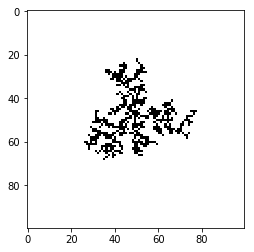

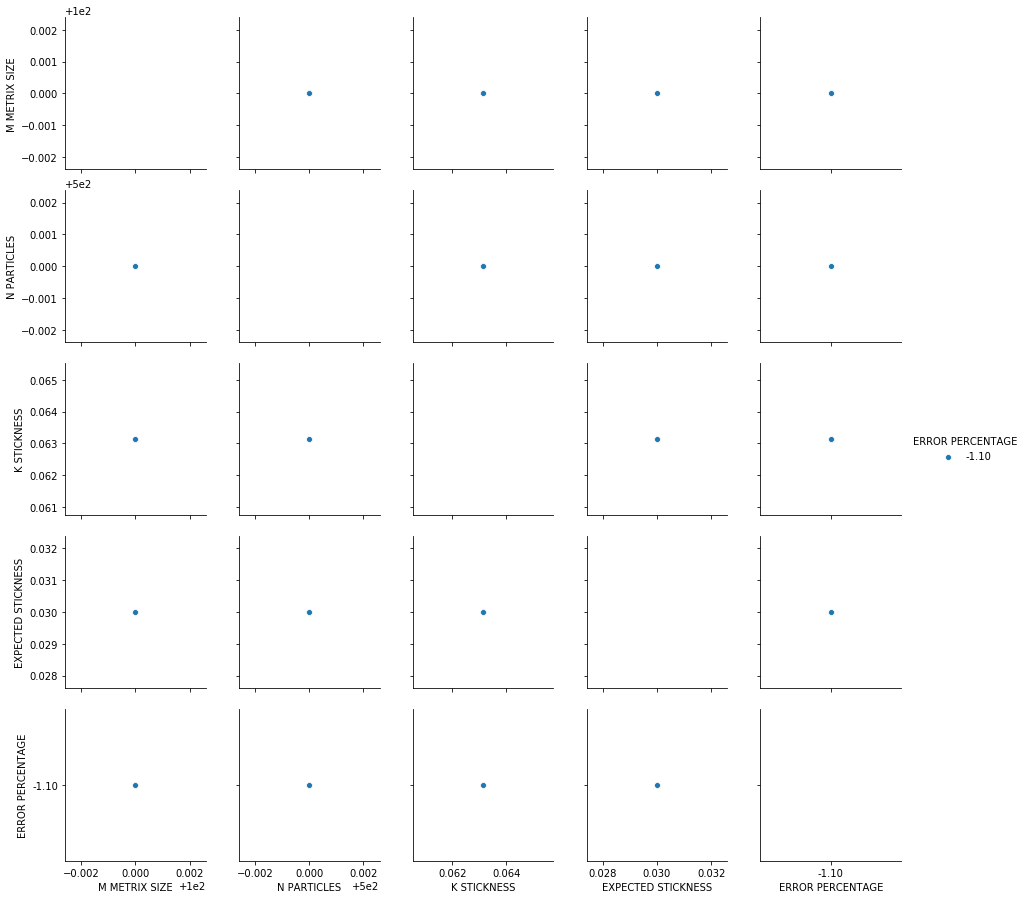

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


def LoadAtEdge(dim):  # Find a random point in randomly selected edge to start with

    upper_edge = (0,np.random.randint(dim-1))      # select a random point in upper edge
    right_edge = (np.random.randint(dim-1),dim-1)  # select a random point in right edge
    lower_edge = (dim-1,np.random.randint(dim-1))  # select a random point in lower edge
    left_edge = (np.random.randint(dim-1),0)       # select a random point in left edge

    all_edges = [upper_edge, right_edge, lower_edge, left_edge ]
    random_edge = all_edges[np.random.randint(4)]  # select the random entry point
    return random_edge

def BrownianMotion(matrix, random_edge,k,i_particle_no):  # Random 2D walk untill a '1' is found in neighbouring cell
    
    play_the_game = 1
    row,col = random_edge
    old_cell = random_edge
    while play_the_game == 1:
        nearby_cells = [(row - 1, col - 1), (row - 1, col), (row - 1, col + 1), (row, col - 1),
                        (row, col + 1), (row + 1, col - 1), (row + 1, col), (row + 1, col + 1)] 
                                                                       # all the possible neighbouring cells 
        nearby_cells = list(filter(lambda cells : (cells[0] < dim and cells[0] > -1) and (cells[1] < dim and cells[1] > -1), nearby_cells))  
                                                                       # ignoring cells which would make particles bounces off the edge
        next_move = nearby_cells[np.random.randint(len(nearby_cells))] # randomly select a cell from the remaining possible cells
        row,col = next_move
        if matrix[next_move] == 1:                                     # if the next move has already one. Stop the flow and load new particle
            matrix[old_cell] = 1
            play_the_game = 0
        for cells in nearby_cells:                                     # stop the random 2D walk if particle encounters another particle in an adjacent cell
            if matrix[cells] == 1:                                     # 1 found in adjacent cell
                nearby_k_cells = GetCellperK(nearby_cells, k, matrix,i_particle_no)          # intoducing K stichness parameter
                if len(nearby_k_cells) > 0:
                    next_move = nearby_k_cells[np.random.randint(len(nearby_k_cells))] # randomly select a cell from the remaining possible cells
                    row,col = next_move
                    break
                else:
                    matrix[old_cell] = 1                                   # particle stuck here forever
                    play_the_game = 0                                      # return back to load the new particle
        old_cell = next_move
        row,col = next_move
        #image = plt.imshow(1- matrix,'gray')
        #plt.cm.gray
    return matrix



def GetCellperK(nearby_cells, k, matrix, i_particle_no):           # If required stickness is lower than curent return empty neighbouring cell only 
    count = 0
    max_particles = int(matrix.shape[0])*int(matrix.shape[0])
    tot_empty_cells = max_particles - i_particle_no
    for cells in nearby_cells:                                     # Take total neighbouring 1's count probablity
        if matrix[cells] != 1: 
            count =count + 1
    if k < ((count/len(nearby_cells)* (tot_empty_cells/max_particles))):
        nearby_cells = list(filter(lambda cells : matrix[cells] != 1, nearby_cells)) # Consider only empty neighboruing cells available for wandering 
        return nearby_cells
    else:
        nearby_cells = []
        return nearby_cells
        
    
# calculating stickness by taking a sample of 1s accross the image
# take squares of increasing sides having eight point across the edges of square
# for each sample data points check the 1s and their neighnbouring emptyvcells. It would give the stickness of that point
# calculate sticknes of each sample point and average it 
# Calulate the total stickiness of whole sample
#sample_squares(ss) =(dim/2)- 1 calculating maximum number of squares possible for sample


def DLAsimulation(dim,particles,k):  
                                                                # start the DLA simulation
    matrix = np.zeros((dim, dim), dtype = int)                  # create the empty matrix
    matrix[(int(dim/2 -1)), (int(dim/2 -1))] = 1                # set the center to 1
    i = 0
    while i < particles:                                        # loop for number of particles
        i+= 1
        random_edge = LoadAtEdge(int(dim))
        j = 0
        while j < 10:                                           # Just a try to start with a random edge which is not already 1  
            j = j + 1
            if matrix[random_edge] == 1:                        # try 10 times to select a random edge in case it's already 1
                random_edge = LoadAtEdge(dim)
            else:
                j = 10
        #matrix[random_edge] = 1   # set the random point to 1 just to show the start
        #plt.imshow(1 - matrix, 'gray')  #show the start of the journey (1- matrix would reverse the matrix for visual purpose)
        #plt.show()
        #matrix = np.zeros((dim, dim), dtype = int)
        #matrix[(int(dim/2 -1)), (int(dim/2 -1))] = 1  # back to normal state
    
        matrix = BrownianMotion(matrix, random_edge,k,i)
    print('Simulation done. Final Image')
    image = plt.imshow(1- matrix,'gray')
    plt.show()
    #cmap = plt.cm.copper
    #image = cmap(matrix1)
    #name =  str(particles) + 'particles' + str(dim) + 'matrix'
    #plt.imsave('name, matrix, cmap=cmap)
    return matrix



def NearbyProbablity(row, col, matrix):
    
    nearby_cells = [(row - 1, col - 1), (row - 1, col), (row - 1, col + 1), (row, col - 1), (row, col + 1),
                    (row + 1, col - 1), (row + 1, col), (row + 1, col + 1)]     # all the possible neighbouring cells
    nearby_empty_cells = list(filter(lambda cells : matrix[cells] != 1, nearby_cells)) # Consider only empty neighboruing cells available for wandering 
    no_of_empty_cell = len(nearby_empty_cells)
    return (no_of_empty_cell/8)



def StickessEstimation(dim,particles, matrix):
    ss = (dim/2)- 1
    i = 0
    nearby_p = 0.0000
    prob_list = []
    while i < ss:
        i = i + 1
        # North west 
        if matrix[int(ss-i),int(ss-i)] == 1:
            nearby_p = NearbyProbablity(int(ss-i), int(ss-i), matrix)
            prob_list.append(nearby_p)
        # South East 
        if matrix[int(ss+i),int(ss+i)] == 1:
            nearby_p = NearbyProbablity(int(ss + i), int(ss+i), matrix)
            prob_list.append(nearby_p)
        # Center West
        if matrix[int(ss),int(ss-i)] == 1:
            nearby_p = NearbyProbablity(int(ss), int(ss-i), matrix)
            prob_list.append(nearby_p)
        # Center East
        if matrix[int(ss),int(ss+i)] == 1:
            nearby_p = NearbyProbablity(int(ss), int(ss+i), matrix)
            prob_list.append(nearby_p)
        # Center North
        if matrix[int(ss-i),int(ss)] == 1:
            nearby_p = NearbyProbablity(int(ss-i), int(ss), matrix)
            prob_list.append(nearby_p)
        # Center South
        if matrix[int(ss+i),int(ss)] == 1:
            nearby_p = NearbyProbablity(int(ss+i), int(ss), matrix)
            prob_list.append(nearby_p)
        # North East
        if matrix[int(ss-i),int(ss+i)] == 1:
            nearby_p = NearbyProbablity(int(ss-i), int(ss+i), matrix)
            prob_list.append(nearby_p)
        # South West
        if matrix[int(ss+i),int(ss-i)] == 1:
            nearby_p = NearbyProbablity(int(ss+i), int(ss-i), matrix)
            prob_list.append(nearby_p)
    stickness = sum(prob_list)/(ss*8)    # probablity out of all data points looked for, 8 points in each sample square
    data = [dim,particles, stickness]
    return data

# Take 10 samples with varying number of particles and K with fixed M = 200

dim = 100
iterations = 0
all_simulatoins = []
particles = 500
k = 0.03
while iterations < 1:
    matrix = DLAsimulation(dim,particles,k)                 # start the DLA Estimations
    data = StickessEstimation(dim,particles,matrix)
    data.append(k)    
    data.append('%.2f'%( 1 - (data[2]/k)))
    all_simulatoins.append(data)
    iterations = iterations + 1
    particles = particles - 1800
    k = k - 0.048
     
sticknes_df = pd.DataFrame(data= all_simulatoins, columns=['M METRIX SIZE','N PARTICLES','K STICKNESS','EXPECTED STICKNESS', 'ERROR PERCENTAGE'])
sticknes_df.to_excel('Varying_k_200x200MatixEstimation.xlsx')
fig = sns.pairplot(sticknes_df,hue = 'ERROR PERCENTAGE')
fig.savefig('Varying_k_pairplot_200x200Matix.pdf')


In [164]:
sticknes_df

,M METRIX SIZE,N PARTICLES,K STICKNESS,EXPECTED STICKNESS,ERROR PERCENTAGE
0,500,10000,0.049573,0.03,-0.65
